In [1]:
import pandas as pd

In [2]:
from milestone1.question1 import get_play_by_play_season_gameType

match_type = 2

get_play_by_play_season_gameType("2015","0"+str(match_type),"data_saved/play_by_play")
get_play_by_play_season_gameType("2016","0"+str(match_type),"data_saved/play_by_play")
get_play_by_play_season_gameType("2017","0"+str(match_type),"data_saved/play_by_play")
get_play_by_play_season_gameType("2018","0"+str(match_type),"data_saved/play_by_play")
get_play_by_play_season_gameType("2019","0"+str(match_type),"data_saved/play_by_play")

100%|███████████████████████████████████████| 1271/1271 [03:08<00:00,  6.74it/s]


In [13]:
from milestone1.question4 import *
from utils import *

#les donnes des saisons régulière seulement!
directory2015 = r'data_saved/play_by_play/2015/regular'
directory2016 = r'data_saved/play_by_play/2016/regular'
directory2017 = r'data_saved/play_by_play/2017/regular'
directory2018 = r'data_saved/play_by_play/2018/regular'
directory2019 = r'data_saved/play_by_play/2019/regular'


dir = get_current_dir()
df2015 = create_full_df(directory=directory2015, parent_dir=dir)
df2016 = create_full_df(directory=directory2016, parent_dir=dir)
df2017 = create_full_df(directory=directory2017, parent_dir=dir)
df2018 = create_full_df(directory=directory2018, parent_dir=dir)

# 2019/20 comme l' ensemble final des données test.
df2019 = create_full_df(directory=directory2019, parent_dir=dir)

[CV 1/3] END colsample_bytree=0.5, gamma=1.5, max_depth=8, min_child_weight=15, subsample=0.7, tree_method=hist;, score=0.708 total time=   3.1s
[CV 3/3] END colsample_bytree=0.7, gamma=5, max_depth=8, min_child_weight=5, subsample=0.9, tree_method=hist;, score=0.733 total time=   1.2s
[CV 2/3] END colsample_bytree=0.5, gamma=2, max_depth=3, min_child_weight=12, subsample=0.5, tree_method=approx;, score=nan total time=   0.1s
[CV 3/3] END colsample_bytree=0.9, gamma=1.5, max_depth=8, min_child_weight=10, subsample=0.7, tree_method=hist;, score=0.706 total time=   3.1s
[CV 2/3] END colsample_bytree=0.5, gamma=1.5, max_depth=8, min_child_weight=15, subsample=0.7, tree_method=hist;, score=0.718 total time=   1.2s
[CV 1/3] END colsample_bytree=0.9, gamma=8, max_depth=6, min_child_weight=15, subsample=1.0, tree_method=hist;, score=0.719 total time=   0.6s
[CV 2/3] END colsample_bytree=0.5, gamma=2, max_depth=3, min_child_weight=12, subsample=0.5, tree_method=approx;, score=0.721 total time=

In [11]:
df15_16 = pd.concat([df2015, df2016], ignore_index=True)
df17_18 = pd.concat([df2017, df2018], ignore_index=True)

#utilise les données 2015/16 - 2018/19 de la saison régulière pour créer vos ensembles d'entraînement et de validation.
df_train_val =  pd.concat([df15_16, df17_18], ignore_index=True).sample(frac=1)

In [12]:
df_train_val.head()

,Game_ID,Event_ID,Period_Number,Period_Time,Game_Time,Shot_or_Goal,Shot_Type,Shooter,Team_of_Shooter,Goalie,Empty_Net,Goal_Strength,X_Coordinate,Y_Coordinate,Distance,Angle,Est_un_but,Filet_vide
293365,2018021202,332,3,19:56,59.93,Shot,Wrist Shot,Paul Stastny,VGK,Devan Dubnyk,NaN,NaN,-88.0,-5.0,5.385165,-68.198591,0,0
28556,2015020565,144,2,02:39,22.65,Shot,Snap Shot,Dale Weise,MTL,Tuukka Rask,NaN,NaN,-57.0,2.0,33.060551,3.468229,0,0
1823,2015020667,190,2,18:26,38.43,Shot,Wrist Shot,Jordan Martinook,ARI,Cory Schneider,NaN,NaN,-67.0,-14.0,26.925824,-31.328693,0,0
222375,2017020224,150,2,05:10,25.16,Shot,Slap Shot,Brian Boyle,NJD,Jake Allen,NaN,NaN,-59.0,-8.0,32.015621,-14.470294,0,0
6853,2015020493,63,1,11:34,11.56,Shot,Snap Shot,Dylan Olsen,FLA,Ryan Miller,NaN,NaN,-47.0,-8.0,43.737855,-10.539184,0,0


In [5]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X = df_train_val[[ "Angle", 'Distance']]
Y = df_train_val[["Est_un_but"]]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=10)
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)
y_pred=y_pred[:, 1]
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print(accuracy)


0.9057338263558934


        Est_un_but
118318           0
123050           0
58421            0
61664            0
276933           0
...            ...
65956            1
23221            0
214893           1
17122            0
35746            1

[102497 rows x 1 columns]


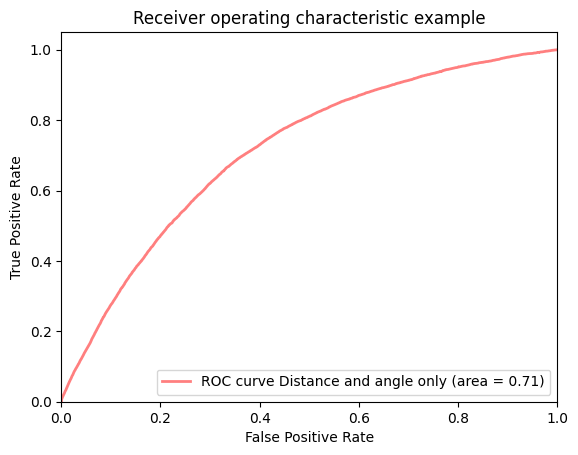

[100  99  98  97  96  95  94  93  92  91  90  89  88  87  86  85  84  83
  82  81  80  79  78  77  76  75  74  73  72  71  70  69  68  67  66  65
  64  63  62  61  60  59  58  57  56  55  54  53  52  51  50  49  48  47
  46  45  44  43  42  41  40  39  38  37  36  35  34  33  32  31  30  29
  28  27  26  25  24  23  22  21  20  19  18  17  16  15  14  13  12  11
  10   9   8   7   6   5   4   3   2   1]
[92.10037589073181, 25.891119241714478, 24.06262457370758, 22.749778628349304, 22.269053757190704, 21.6559961438179, 21.37390524148941, 20.986244082450867, 20.748719573020935, 20.371010899543762, 20.002810657024384, 19.80874538421631, 19.532740116119385, 18.901899456977844, 18.746565282344818, 18.249979615211487, 17.786675691604614, 17.440152168273926, 17.03004688024521, 16.620001196861267, 16.04141741991043, 15.676930546760559, 15.34651666879654, 15.10874480009079, 14.671288430690765, 14.370018243789673, 13.95207720994947, 13.661852478981018, 13.415171205997467, 13.029925525188446, 12.

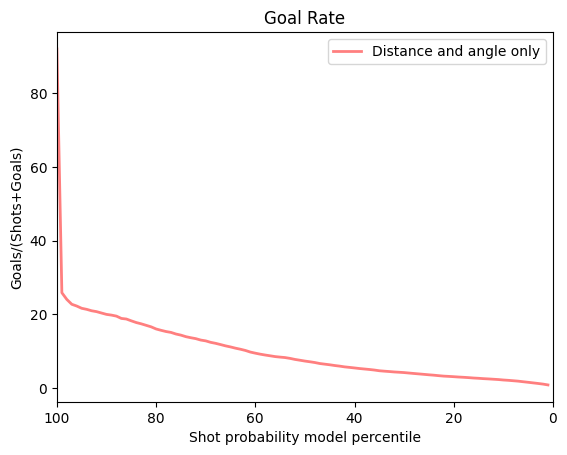

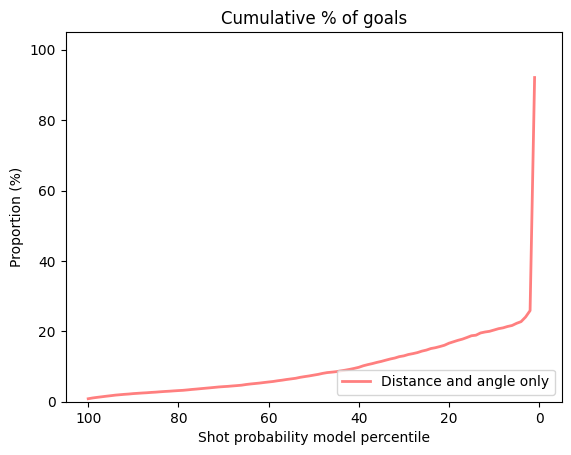

(102497, 2)


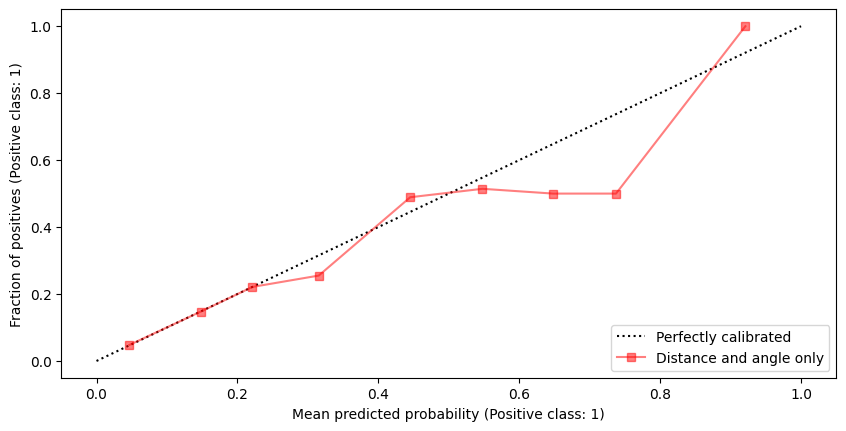

In [6]:
from utils import *

create_plots(X_test, y_test.to_numpy(), y_pred, 'Distance and angle only')


In [4]:
from utils import *

df_train_val["Game_Time"] = (df_train_val["Game_Time"]*60).apply(lambda x: int(x))
df_train_val["Change_ID"] = [False]+[df_train_val["Game_ID"][i] == df_train_val["Game_ID"][i-1] for i in range(1, len(df_train_val))]
col = list()
df_train_val['goal']=df_train_val.Shot_or_Goal.astype('category')
goal_mode = df_train_val.goal.mode().iloc[0]
for i in range(len(df_train_val.Shot_or_Goal)):
    if df_train_val.Change_ID[i] and i-1 >= 0:
        col += [df_train_val.goal[i-1]]
    else:
        col += [np.nan] 

df_train_val["Pre_type"] = col
#df_train_val["Pre_type"] = df_train_val["Pre_type"].astype('category')
print(df_train_val["Pre_type"])
col = list()
for i in range(len(df_train_val)):
    if df_train_val.Change_ID[i] and i-1 >= 0:
        col += [df_train_val.X_Coordinate[i-1]]
    else:
        col += [np.nan] 

df_train_val["Pre_X"] = col
col = list()
for i in range(len(df_train_val)):
    if df_train_val.Change_ID[i] and i-1 >= 0:
        col += [df_train_val.Y_Coordinate[i-1]]
    else:
        col += [np.nan] 

df_train_val["Pre_Y"] = col
df_train_val["Time_Since_LastEvnt"] = abs(df_train_val["Game_Time"].diff())
for i in range(len(df_train_val)):
    if df_train_val.Change_ID[i]:
        continue
    else:
        df_train_val.at[i, "Time_Since_LastEvnt"] = np.nan
col = list()
for i in range(len(df_train_val)):
    if df_train_val.Change_ID[i]:
        col += [abs(np.linalg.norm(np.array([df_train_val.X_Coordinate[i], df_train_val.Y_Coordinate[i]]) - np.array([df_train_val.Pre_X[i], df_train_val.Pre_Y[i]])))]
    else:
        col += [np.nan] 

df_train_val["Dist_from_LastEvnt"] = col
df_train_val["Rebond"] = [df_train_val.Shot_or_Goal[i] == df_train_val.Pre_type[i] for i in range(len(df_train_val))]
df_train_val["Changement_d'angle_de_tir"] = [int(df_train_val.Rebond[i]) for i in range(len(df_train_val))]
df_train_val["Vitesse"] = df_train_val.Dist_from_LastEvnt/df_train_val.Time_Since_LastEvnt


print(df_train_val.columns)


195073     NaN
239266    Shot
278332    Shot
82748     Shot
18730     Shot
          ... 
67454     Shot
119984    Shot
25625     Shot
190595    Shot
153030    Goal
Name: Pre_type, Length: 310596, dtype: object
Index(['Game_ID', 'Event_ID', 'Period_Number', 'Period_Time', 'Game_Time',
       'Shot_or_Goal', 'Shot_Type', 'Shooter', 'Team_of_Shooter', 'Goalie',
       'Empty_Net', 'Goal_Strength', 'X_Coordinate', 'Y_Coordinate',
       'Distance', 'Angle', 'Est_un_but', 'Filet_vide', 'Change_ID', 'goal',
       'Pre_type', 'Pre_X', 'Pre_Y', 'Time_Since_LastEvnt',
       'Dist_from_LastEvnt', 'Rebond', 'Changement_d'angle_de_tir', 'Vitesse'],
      dtype='object')


Game_Time                       int64
Period_Number                   int64
X_Coordinate                  float64
Rebond                       category
Pre_type                     category
Y_Coordinate                  float64
Distance                      float64
Angle                         float64
Changement_d'angle_de_tir       int64
Vitesse                       float64
Time_Since_LastEvnt           float64
Pre_X                         float64
Pre_Y                         float64
Dist_from_LastEvnt            float64
dtype: object
0.9066509263685767
[0.0396654  0.01976166 0.11142437 ... 0.02897538 0.31051406 0.28218994]
(102497, 1)


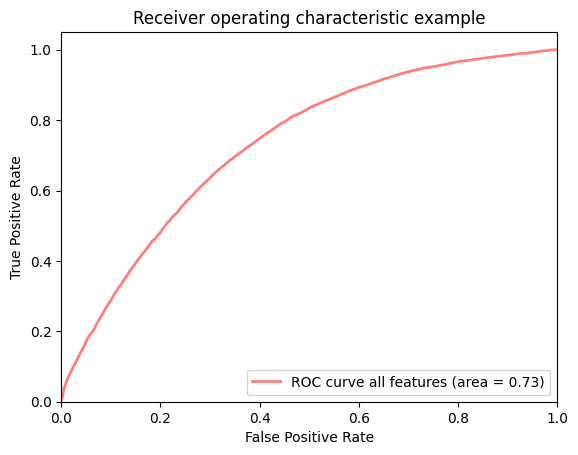

[100  99  98  97  96  95  94  93  92  91  90  89  88  87  86  85  84  83
  82  81  80  79  78  77  76  75  74  73  72  71  70  69  68  67  66  65
  64  63  62  61  60  59  58  57  56  55  54  53  52  51  50  49  48  47
  46  45  44  43  42  41  40  39  38  37  36  35  34  33  32  31  30  29
  28  27  26  25  24  23  22  21  20  19  18  17  16  15  14  13  12  11
  10   9   8   7   6   5   4   3   2   1]
[55.88902235031128, 31.911557912826538, 25.856735825538653, 23.825769126415253, 22.086364030838013, 21.22991383075714, 20.83074599504471, 20.395907759666443, 20.03045380115509, 19.51456069946289, 19.212917983531952, 18.95378828048706, 18.50973069667816, 18.341796100139618, 18.040278553962708, 17.76619702577591, 17.333902418613434, 17.059868574142456, 16.66214019060135, 16.256174445152283, 15.868614614009857, 15.436722338199607, 15.164399147033691, 14.836293458938599, 14.49878066778183, 14.035086333751678, 13.666722178459167, 13.347500562667847, 13.111092150211334, 12.897701561450958, 12

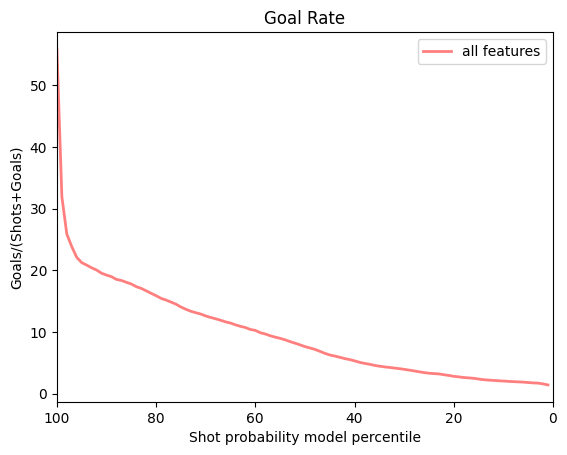

[393, 291, 230, 229, 216, 238, 214, 168, 232, 195, 153, 246, 142, 231, 193, 180, 161, 180, 164, 153, 161, 136, 144, 190, 149, 124, 130, 175, 132, 130, 140, 129, 112, 142, 106, 106, 102, 112, 100, 109, 104, 84, 104, 97, 100, 83, 93, 86, 78, 95, 61, 70, 74, 69, 66, 58, 56, 54, 59, 66, 56, 54, 50, 40, 48, 46, 56, 43, 45, 45, 45, 37, 41, 29, 33, 22, 24, 28, 26, 29, 32, 27, 18, 19, 18, 24, 17, 18, 20, 18, 16, 19, 23, 10, 13, 17, 24, 19, 17, 5]
[ 393  684  914 1143 1359 1597 1811 1979 2211 2406 2559 2805 2947 3178
 3371 3551 3712 3892 4056 4209 4370 4506 4650 4840 4989 5113 5243 5418
 5550 5680 5820 5949 6061 6203 6309 6415 6517 6629 6729 6838 6942 7026
 7130 7227 7327 7410 7503 7589 7667 7762 7823 7893 7967 8036 8102 8160
 8216 8270 8329 8395 8451 8505 8555 8595 8643 8689 8745 8788 8833 8878
 8923 8960 9001 9030 9063 9085 9109 9137 9163 9192 9224 9251 9269 9288
 9306 9330 9347 9365 9385 9403 9419 9438 9461 9471 9484 9501 9525 9544
 9561 9566]
95.66


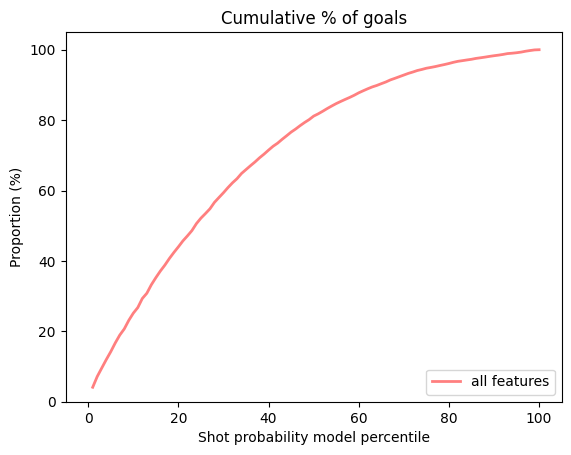

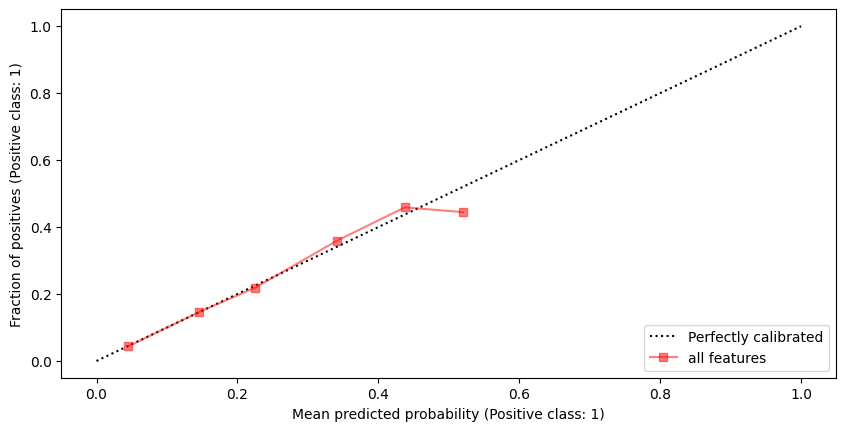

In [5]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from utils import *


df_train_val_params = df_train_val[["Game_Time","Period_Number", "X_Coordinate", "Y_Coordinate", "Distance", "Angle", "Rebond", "Changement_d'angle_de_tir", "Vitesse", "Time_Since_LastEvnt", "Pre_X", "Pre_type", "Pre_Y", "Dist_from_LastEvnt", "Est_un_but"]]
df_train_val_params = df_train_val_params.copy()
df_train_val_params = replace_nans(df_train_val_params)
df_train_val_params = replace_infs(df_train_val_params)
df_train_val_params["Rebond"]=df_train_val_params["Rebond"].astype("category")
df_train_val_params["Pre_type"]=df_train_val_params["Pre_type"].astype("category")

X = df_train_val_params[["Game_Time","Period_Number",  "X_Coordinate", "Rebond", "Pre_type", "Y_Coordinate", "Distance", "Angle", "Changement_d'angle_de_tir", "Vitesse", "Time_Since_LastEvnt", "Pre_X", "Pre_Y", "Dist_from_LastEvnt"]]
Y = df_train_val_params[["Est_un_but"]]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=10)
#model = XGBClassifier(tree_method="hist", enable_categorical=True, subsample= 1, min_child_weight= 1, max_depth= 5, gamma= 5, colsample_bytree= 0.8, eval_metric='auc', disable_default_eval_metric=True)
model = XGBClassifier(tree_method="hist", enable_categorical=True, subsample= 1, min_child_weight= 15, max_depth= 6, gamma= 8, colsample_bytree= 0.9, eval_metric='auc', disable_default_eval_metric=True)

print(X_train.dtypes)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)
y_pred=y_pred[:, 1]
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

#ytest = y_test['Est_un_but']
print(y_pred)
print(y_test.shape)

create_plots(X_test, y_test.to_numpy().reshape(y_test.shape[0]), y_pred, 'all features')

In [10]:
from utils import *

print(grid_search(X, Y["Est_un_but"], model))


Fitting 3 folds for each of 6 candidates, totalling 18 fits


/Users/saifkurdi-teylouni/Downloads/ift-6758-a22/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/saifkurdi-teylouni/Downloads/ift-6758-a22/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/saifkurdi-teylouni/Downloads/ift-6758-a22/.venv/lib/python3.9/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/Users/saifkurdi-teylouni/Downloads/ift-6758-a22/.venv/lib/python3.9

{'tree_method': 'hist', 'subsample': 1.0, 'min_child_weight': 15, 'max_depth': 6, 'gamma': 8, 'colsample_bytree': 0.9}


Series([], dtype: object)
[]
[]
0.9066704391348039


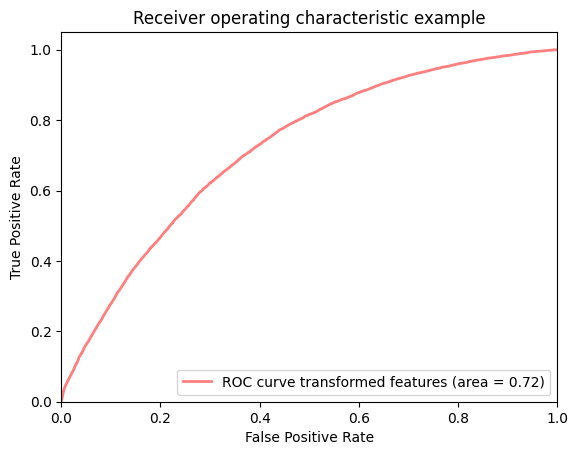

[100  99  98  97  96  95  94  93  92  91  90  89  88  87  86  85  84  83
  82  81  80  79  78  77  76  75  74  73  72  71  70  69  68  67  66  65
  64  63  62  61  60  59  58  57  56  55  54  53  52  51  50  49  48  47
  46  45  44  43  42  41  40  39  38  37  36  35  34  33  32  31  30  29
  28  27  26  25  24  23  22  21  20  19  18  17  16  15  14  13  12  11
  10   9   8   7   6   5   4   3   2   1]
[47.92451858520508, 28.815993428228833, 24.043698608875275, 22.389715909957886, 21.351267397403717, 21.027368307113647, 20.6340953707695, 20.34410983324051, 19.87370401620865, 19.63493973016739, 19.216397404670715, 18.923693895339966, 18.534544110298157, 18.387696146965027, 18.080686032772064, 17.80649423599243, 17.434994876384735, 17.170818150043488, 16.626599431037903, 16.05667471885681, 15.708523988723755, 15.304665267467499, 14.938004314899445, 14.583128690719604, 14.21458125114441, 13.92279863357544, 13.65506649017334, 13.349908590316772, 13.054598867893219, 12.870843708515167, 12.

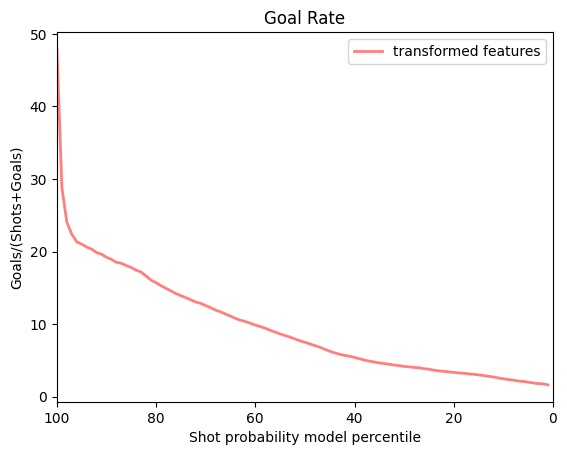

[380, 214, 230, 246, 248, 185, 185, 226, 197, 205, 194, 175, 242, 180, 186, 181, 171, 167, 148, 147, 149, 141, 151, 133, 167, 145, 121, 158, 147, 141, 138, 119, 129, 101, 108, 110, 106, 105, 114, 108, 88, 111, 85, 102, 86, 92, 112, 73, 78, 72, 72, 67, 75, 50, 76, 77, 66, 67, 51, 45, 56, 62, 61, 47, 54, 57, 54, 43, 55, 40, 25, 58, 30, 43, 36, 34, 40, 29, 30, 32, 34, 30, 25, 34, 30, 19, 33, 16, 24, 25, 14, 21, 25, 14, 26, 17, 15, 13, 11, 11]
[ 380  594  824 1070 1318 1503 1688 1914 2111 2316 2510 2685 2927 3107
 3293 3474 3645 3812 3960 4107 4256 4397 4548 4681 4848 4993 5114 5272
 5419 5560 5698 5817 5946 6047 6155 6265 6371 6476 6590 6698 6786 6897
 6982 7084 7170 7262 7374 7447 7525 7597 7669 7736 7811 7861 7937 8014
 8080 8147 8198 8243 8299 8361 8422 8469 8523 8580 8634 8677 8732 8772
 8797 8855 8885 8928 8964 8998 9038 9067 9097 9129 9163 9193 9218 9252
 9282 9301 9334 9350 9374 9399 9413 9434 9459 9473 9499 9516 9531 9544
 9555 9566]
95.66


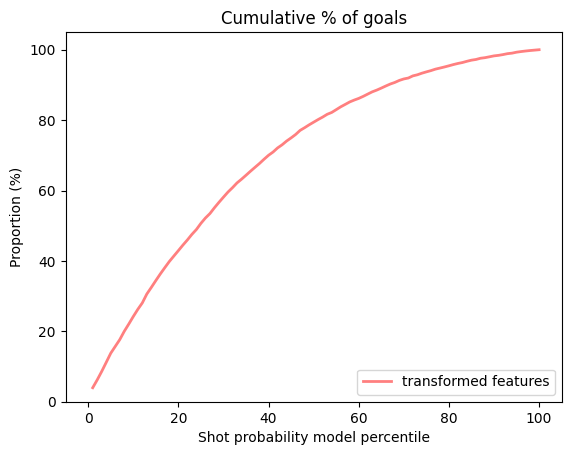

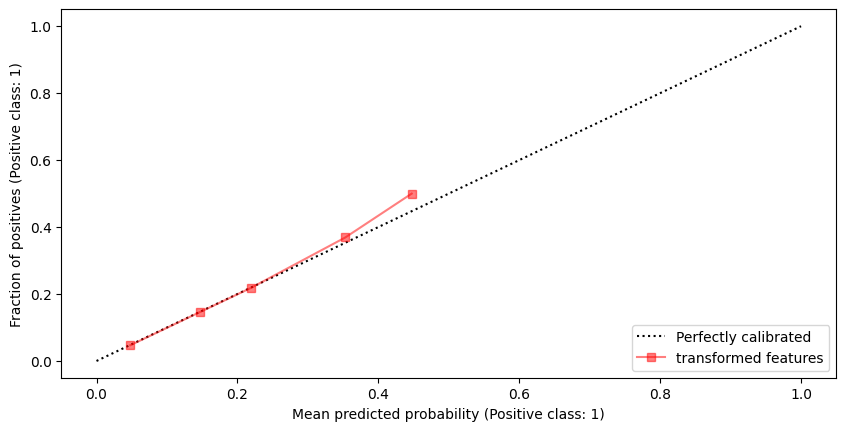

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, f_classif, chi2,  mutual_info_classif
from utils import *

fs = SelectKBest(score_func=mutual_info_classif, k=5)
W=X[["Game_Time","Period_Number", "X_Coordinate", "Y_Coordinate", "Distance", "Angle", "Changement_d'angle_de_tir", "Time_Since_LastEvnt", "Pre_X", "Pre_Y", "Dist_from_LastEvnt"]].copy()
X_transf = fs.fit_transform(W, Y["Est_un_but"])
X_train, X_test, y_train, y_test = train_test_split(X_transf, Y["Est_un_but"], test_size=0.33, random_state=10)
#model = XGBClassifier(tree_method="hist", enable_categorical=True, subsample= 1, min_child_weight= 5, max_depth= 8, gamma= 5, colsample_bytree= 0.7, eval_metric='auc', disable_default_eval_metric=True)
model = XGBClassifier(tree_method="hist", enable_categorical=True, subsample= 1, min_child_weight= 15, max_depth= 6, gamma= 8, colsample_bytree= 0.9, eval_metric='auc', disable_default_eval_metric=True)

model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)
y_pred=y_pred[:, 1]
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

create_plots(X_test, y_test.to_numpy().reshape(y_test.shape[0]), y_pred, 'transformed features')

In [8]:
from utils import *

print(grid_search(X_transf, Y["Est_un_but"], model))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
{'tree_method': 'hist', 'subsample': 1.0, 'min_child_weight': 15, 'max_depth': 6, 'gamma': 8, 'colsample_bytree': 0.9}
